# Problem Statement:

Develop a comprehensive data analysis and visualization tool for Uber Rides Data using Python to identify key trends in ride patterns, fare distribution, and trip distances. The project aims to uncover insights into peak ride times, fare variability, and user behavior, enabling better decision-making for optimizing Uber's operations and enhancing the customer experience.

In [295]:
# librarys
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [296]:
# import data frame
df = pd.read_csv(r"D:\model\UberDataset.csv")
df

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE
0,01-01-2016 21:11,01-01-2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,01-02-2016 01:25,01-02-2016 01:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,01-02-2016 20:25,01-02-2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,01-05-2016 17:31,01-05-2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,01-06-2016 14:42,01-06-2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit
...,...,...,...,...,...,...,...
1151,12/31/2016 13:24,12/31/2016 13:42,Business,Kar?chi,Unknown Location,3.9,Temporary Site
1152,12/31/2016 15:03,12/31/2016 15:38,Business,Unknown Location,Unknown Location,16.2,Meeting
1153,12/31/2016 21:32,12/31/2016 21:50,Business,Katunayake,Gampaha,6.4,Temporary Site
1154,12/31/2016 22:08,12/31/2016 23:51,Business,Gampaha,Ilukwatta,48.2,Temporary Site


"This document contains 1156 rows and 7 columns."

EDA


In [297]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1156 entries, 0 to 1155
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   START_DATE  1156 non-null   object 
 1   END_DATE    1155 non-null   object 
 2   CATEGORY    1155 non-null   object 
 3   START       1155 non-null   object 
 4   STOP        1155 non-null   object 
 5   MILES       1156 non-null   float64
 6   PURPOSE     653 non-null    object 
dtypes: float64(1), object(6)
memory usage: 63.3+ KB


The df.info() function in pandas is used to get a concise summary of a DataFrame. It provides important information about the DataFrame.

In [298]:
df.describe()

,MILES
count,1156.000000
mean,21.115398
std,359.299007
min,0.500000
25%,2.900000
50%,6.000000
75%,10.400000
max,12204.700000


The df.describe() function in pandas provides a summary of statistical information about the numeric columns in a DataFrame. It helps you understand the distribution and range of your data.

In [299]:
df.columns

Index(['START_DATE', 'END_DATE', 'CATEGORY', 'START', 'STOP', 'MILES',
       'PURPOSE'],
      dtype='object')

The df.columns attribute in pandas returns the list of column names of a DataFrame. It helps you quickly see what columns (or features) are present in your dataset.

In [300]:
df.shape

(1156, 7)

In [301]:
# cheak the null values
df.isnull().sum()

START_DATE      0
END_DATE        1
CATEGORY        1
START           1
STOP            1
MILES           0
PURPOSE       503
dtype: int64

In [302]:
# drop the null values
df['PURPOSE'] = df['PURPOSE'].fillna('Unknown')
df.dropna(inplace=True)

"Checked for null values in all columns and removed the null values."

In [303]:
# cheak the duplicate values
df[df.duplicated()]

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE
492,6/28/2016 23:34,6/28/2016 23:59,Business,Durham,Cary,9.9,Meeting


In [304]:
df.duplicated().sum() 

np.int64(1)

In [305]:
#  drop the duplicate values
df.drop_duplicates(inplace=True)
df.duplicated().sum()

np.int64(0)

"Checked for duplicate values in the dataset and removed the duplicate values."

Feature Engineering


In [306]:
#  cheak the value counts of purpose column
df['PURPOSE'].value_counts()

PURPOSE
Unknown            502
Meeting            186
Meal/Entertain     160
Errand/Supplies    128
Customer Visit     101
Temporary Site      50
Between Offices     18
Moving               4
Airport/Travel       3
Commute              1
Charity ($)          1
Name: count, dtype: int64

"We will order the values in the purpose column to see which services users are utilizing the most on Uber."

In [309]:
# The values in the 'START_DATE' and 'END_DATE' columns are all converted to datetime format 
df['START_DATE'] = pd.to_datetime(df['START_DATE'], format='mixed')
df['END_DATE'] = pd.to_datetime(df['END_DATE'], format='mixed')

In [310]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1154 entries, 0 to 1154
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   START_DATE  1154 non-null   datetime64[ns]
 1   END_DATE    1154 non-null   datetime64[ns]
 2   CATEGORY    1154 non-null   object        
 3   START       1154 non-null   object        
 4   STOP        1154 non-null   object        
 5   MILES       1154 non-null   float64       
 6   PURPOSE     1154 non-null   object        
dtypes: datetime64[ns](2), float64(1), object(4)
memory usage: 72.1+ KB


In [311]:
# We changed the column names to lowercase

df.rename(columns={
    'START_DATE': 'start_date',
    'END_DATE': 'end_date',
    'CATEGORY': 'category',
    'START' : 'start',
    'STOP' : 'stop',
    'MILES' : 'miles',
    'PURPOSE' : 'purpose'
}, inplace=True)

In [313]:
#  create a new columns
df['day_name'] = df['start_date'].dt.day_name()
df["month"] = df['start_date'].dt.month_name()

"create two new columns, 'day_name' and 'month', in the DataFrame, where we will add the day and month extracted from the existing date columns. This will help us identify in which month and on which day people are using Uber the most."

In [315]:
# Create a new column to define a time period.
time_periods = [0, 6, 12, 18, 24]
labels = ['Night', 'Morning', 'Afternoon', 'Evening']

df['time_label'] = pd.cut(df['start_date'].dt.hour, bins=time_periods, labels=labels, right=False)

"We extracted the time from the start date column and created two new columns named time_label and duration. This process allows us to determine at what time users are traveling and how long they have been traveling."

In [317]:
df['duration'] = (df['end_date'] - df['start_date'])

"In the duration column, we used the end date column to calculate how long people have been traveling. This helps us understand the duration of their trips."

In [337]:
df.head()

,start_date,end_date,category,start,stop,miles,purpose,day_name,month,time_label,duration
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,Friday,January,Evening,6.0
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,Unknown,Saturday,January,Night,12.0
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,Saturday,January,Evening,13.0
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,Tuesday,January,Afternoon,14.0
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,Wednesday,January,Afternoon,67.0


In [319]:
# Creating new features for better analysis and accuracy

df['day_name'] = df['start_date'].dt.day_name()

time_periods = [0, 6, 12, 18, 24]
labels = ['Night', 'Morning', 'Afternoon', 'Evening']

df['time_label'] = pd.cut(df['start_date'].dt.hour, bins=time_periods, labels=labels, right=False)

df["month"] = df['start_date'].dt.month_name()

df['duration'] = (df['end_date'] - df['start_date']).dt.total_seconds() / 60

This code snippet enhances the dataset by creating new features for improved analysis:

day_name: Extracts the day name (e.g., Monday) from the start_date column.

time_label: Categorizes the hour of the start_date into defined time periods (Night, Morning, Afternoon, Evening) based on specified boundaries.

month: Extracts the month name (e.g., January) from the start_date column.

duration: Calculates the trip duration in minutes by finding the difference between end_date and start_date.

These new features allow for deeper insights into trip patterns and help analyze user behavior effectively.

In [320]:
df.head(2)

,start_date,end_date,category,start,stop,miles,purpose,day_name,month,time_label,duration
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,Friday,January,Evening,6.0
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,Unknown,Saturday,January,Night,12.0


visulactions

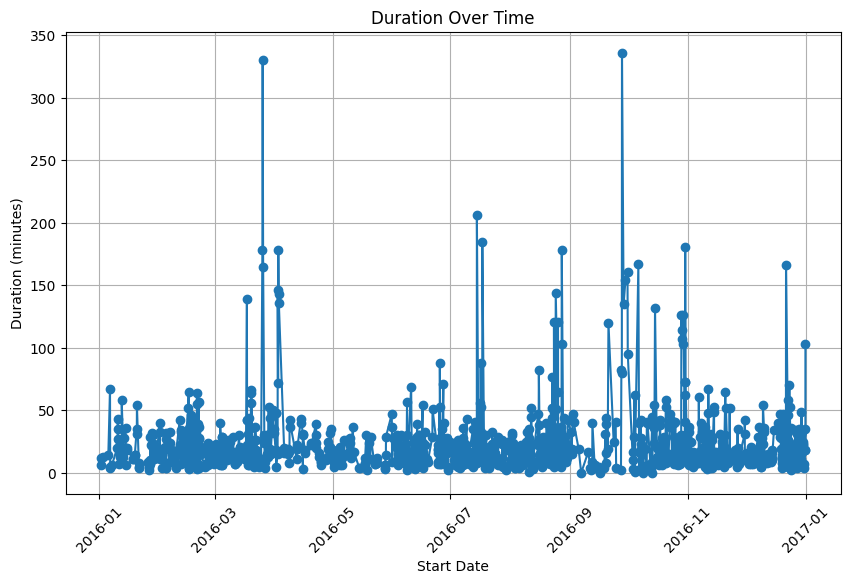

In [321]:
plt.figure(figsize=(10, 6))
plt.plot(df['start_date'], df['duration'], marker='o')
plt.title('Duration Over Time')
plt.xlabel('Start Date')
plt.ylabel('Duration (minutes)')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

The provided code generates a line plot that visualizes the duration of Uber rides over time. This uses one year of data from 2016 to 2017, allowing us to identify during which time periods users traveled the most.

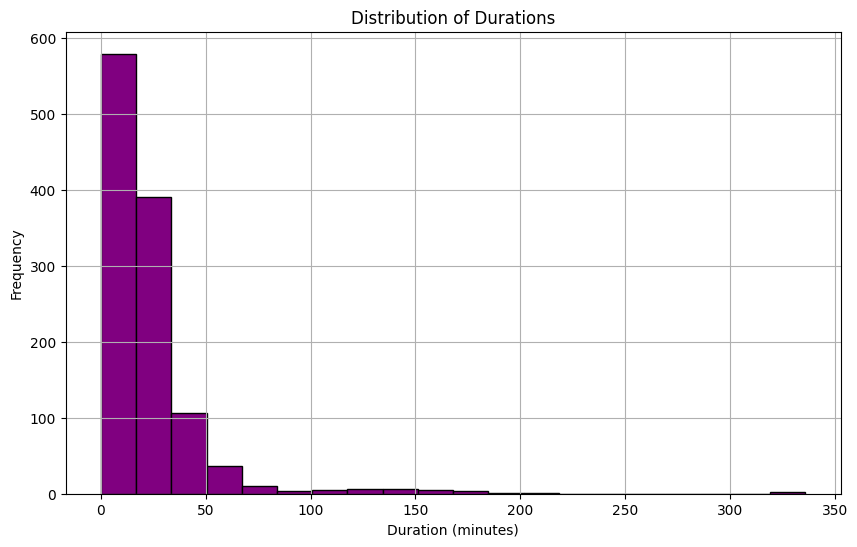

In [322]:
plt.figure(figsize=(10, 6))
plt.hist(df['duration'], bins=20, color='purple', edgecolor='black')
plt.title('Distribution of Durations')
plt.xlabel('Duration (minutes)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

This plot shows that users high use Uber for durations between 0 to 50 minutes, while other ranges are similar

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
 [Text(0, 0, 'Meal/Entertain'),
  Text(1, 0, 'Unknown'),
  Text(2, 0, 'Errand/Supplies'),
  Text(3, 0, 'Meeting'),
  Text(4, 0, 'Customer Visit'),
  Text(5, 0, 'Temporary Site'),
  Text(6, 0, 'Between Offices'),
  Text(7, 0, 'Charity ($)'),
  Text(8, 0, 'Commute'),
  Text(9, 0, 'Moving'),
  Text(10, 0, 'Airport/Travel')])

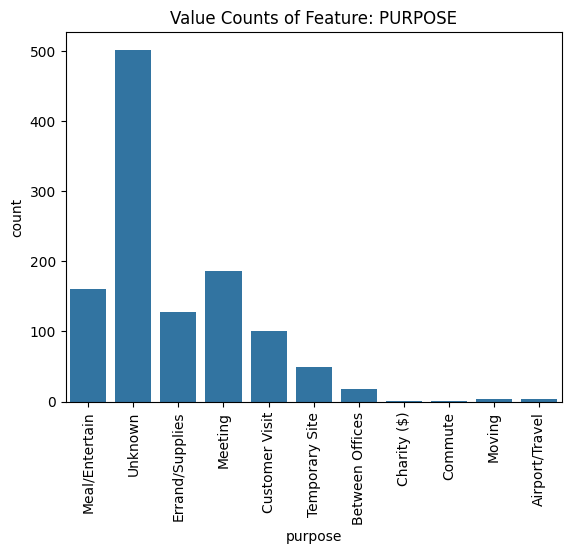

In [323]:
sns.countplot(x=df["purpose"])
plt.title("Value Counts of Feature: PURPOSE")
plt.xticks(rotation=90)

"  By using a count plot, we can observe user usage patterns, indicating that users frequently utilize Uber for reasons categorized as "unknown." Additionally, they use Uber significantly for purposes related to the next meeting and meal/entertainment outings. In contrast, there are fewer users relying on Uber for charity and commute categories, showing lower engagement in those areas."

C:\Users\Arunk\AppData\Local\Temp\ipykernel_28036\2477463708.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=ride_purpose_counts.values, y=ride_purpose_counts.index, palette='viridis')


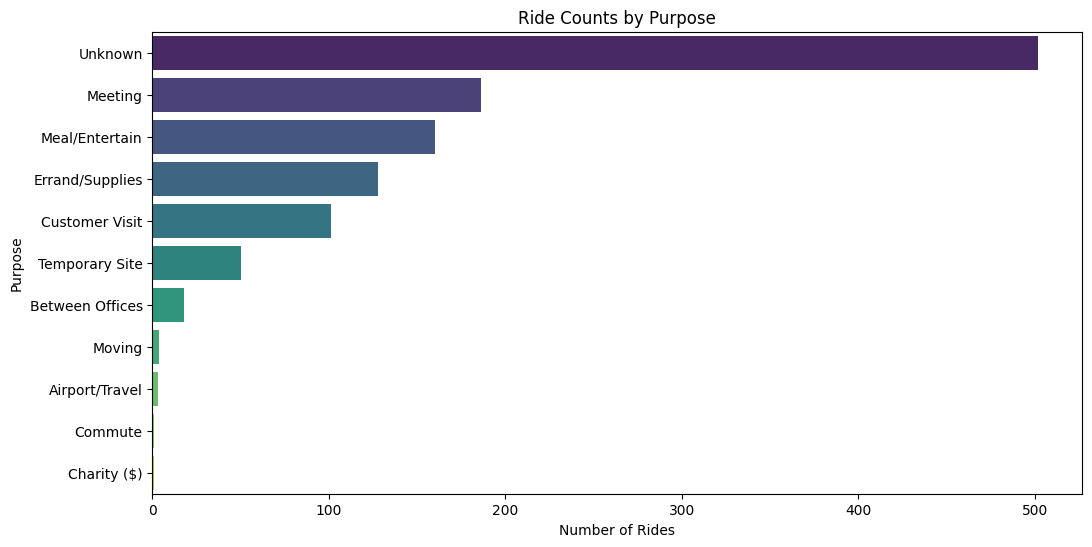

In [324]:
ride_purpose_counts = df['purpose'].value_counts()

# Plot the distribution of ride counts per purpose
plt.figure(figsize=(12, 6))
sns.barplot(x=ride_purpose_counts.values, y=ride_purpose_counts.index, palette='viridis')
plt.title('Ride Counts by Purpose')
plt.xlabel('Number of Rides')
plt.ylabel('Purpose')
plt.show()

([0, 1], [Text(0, 0, 'Business'), Text(1, 0, 'Personal')])

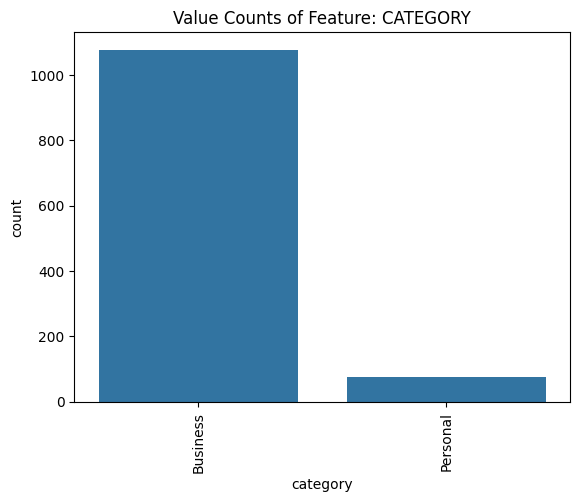

In [325]:
sns.countplot(x=df["category"])
plt.title("Value Counts of Feature: CATEGORY")
plt.xticks(rotation=90)

In the category columns, it is evident that users frequently utilize Uber for business purposes. This indicates a strong demand for Uber services among professionals and business travelers, highlighting the platform's role in facilitating work-related travel.

([0, 1, 2, 3, 4, 5, 6],
 [Text(0, 0, 'Friday'),
  Text(1, 0, 'Saturday'),
  Text(2, 0, 'Tuesday'),
  Text(3, 0, 'Wednesday'),
  Text(4, 0, 'Thursday'),
  Text(5, 0, 'Sunday'),
  Text(6, 0, 'Monday')])

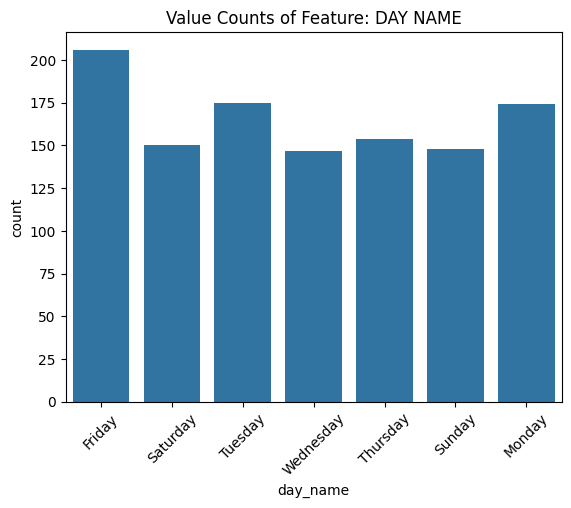

In [326]:
sns.countplot(x=df["day_name"])
plt.title("Value Counts of Feature: DAY NAME")
plt.xticks(rotation=45)

Users tend to use Uber the most on Fridays, indicating a preference for rides at the end of the workweek. Following Fridays, the next highest usage occurs on Tuesdays and Mondays, suggesting that users often require transportation at the beginning of the week as well. Conversely, there is a noticeable decrease in Uber usage on Wednesdays, indicating that this day sees fewer ride requests from users.

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
 [Text(0, 0, 'January'),
  Text(1, 0, 'February'),
  Text(2, 0, 'March'),
  Text(3, 0, 'April'),
  Text(4, 0, 'May'),
  Text(5, 0, 'June'),
  Text(6, 0, 'July'),
  Text(7, 0, 'August'),
  Text(8, 0, 'September'),
  Text(9, 0, 'October'),
  Text(10, 0, 'November'),
  Text(11, 0, 'December')])

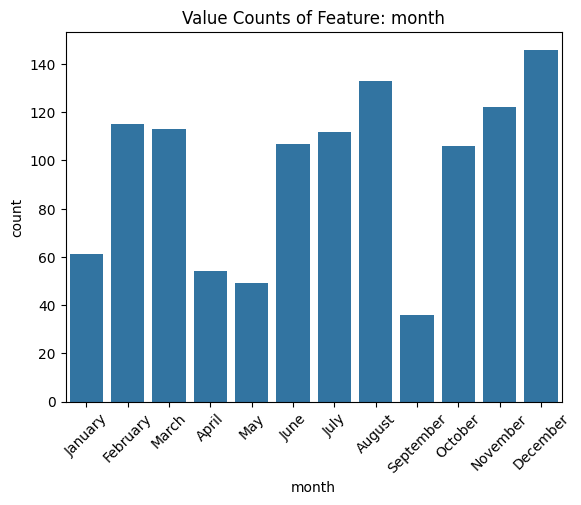

In [327]:
sns.countplot(x=df["month"])
plt.title("Value Counts of Feature: month")
plt.xticks(rotation=45)

Users tend to utilize Uber the most in December, indicating a peak in demand during this month. Following December, the next highest usage occurs in August and November, suggesting that these months also see significant ride requests. In contrast, the lowest usage is observed in September and, to some extent, May, indicating that fewer users rely on Uber during these months.

([0, 1, 2, 3],
 [Text(0, 0, 'Night'),
  Text(1, 0, 'Morning'),
  Text(2, 0, 'Afternoon'),
  Text(3, 0, 'Evening')])

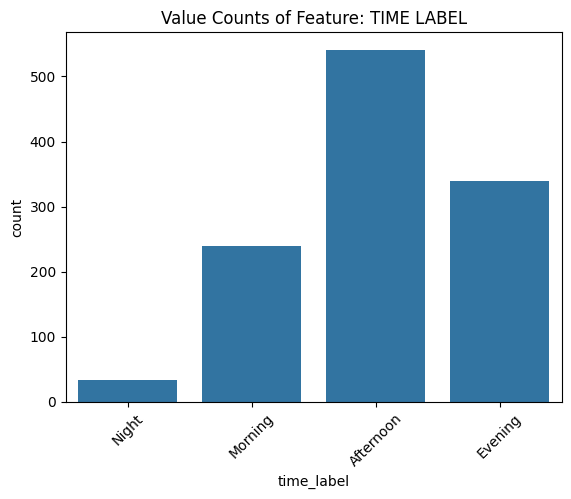

In [328]:
sns.countplot(x=df["time_label"])
plt.title("Value Counts of Feature: TIME LABEL")
plt.xticks(rotation=45)

Users commonly utilize Uber during the afternoon, indicating that this time is popular for rides. In contrast, usage is noticeably lower during the night, suggesting that fewer users rely on Uber for transportation during these hours.

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
 [Text(0, 0, 'Meal/Entertain'),
  Text(1, 0, 'Unknown'),
  Text(2, 0, 'Errand/Supplies'),
  Text(3, 0, 'Meeting'),
  Text(4, 0, 'Customer Visit'),
  Text(5, 0, 'Temporary Site'),
  Text(6, 0, 'Between Offices'),
  Text(7, 0, 'Charity ($)'),
  Text(8, 0, 'Commute'),
  Text(9, 0, 'Moving'),
  Text(10, 0, 'Airport/Travel')])

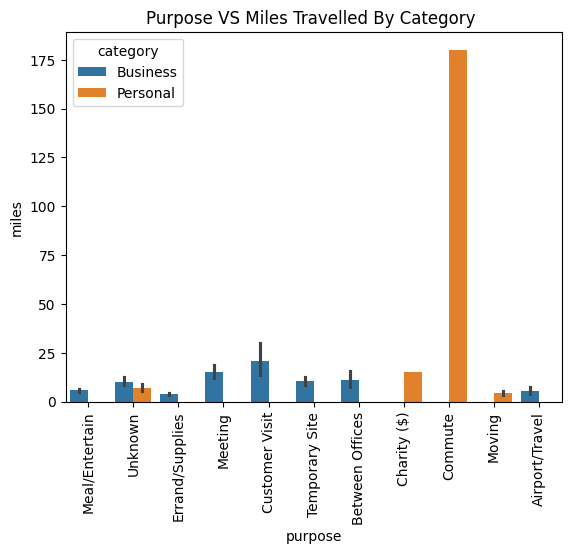

In [329]:
sns.barplot(x= df["purpose"], y= df['miles'],hue = df["category"])
plt.title("Purpose VS Miles Travelled By Category ")
plt.xticks(rotation=90)

When examining the purposes for which users travel the most miles, it is evident that users frequently travel significant distances for business or personal reasons. Specifically, users traveling for commute purposes tend to accumulate the highest mileage. On the other hand, personal users also demonstrate considerable mileage but primarily for commuting. The remaining categories show similar travel patterns, indicating that the distances traveled are relatively consistent across various purposes.

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
 [Text(0, 0, 'Meal/Entertain'),
  Text(1, 0, 'Unknown'),
  Text(2, 0, 'Errand/Supplies'),
  Text(3, 0, 'Meeting'),
  Text(4, 0, 'Customer Visit'),
  Text(5, 0, 'Temporary Site'),
  Text(6, 0, 'Between Offices'),
  Text(7, 0, 'Charity ($)'),
  Text(8, 0, 'Commute'),
  Text(9, 0, 'Moving'),
  Text(10, 0, 'Airport/Travel')])

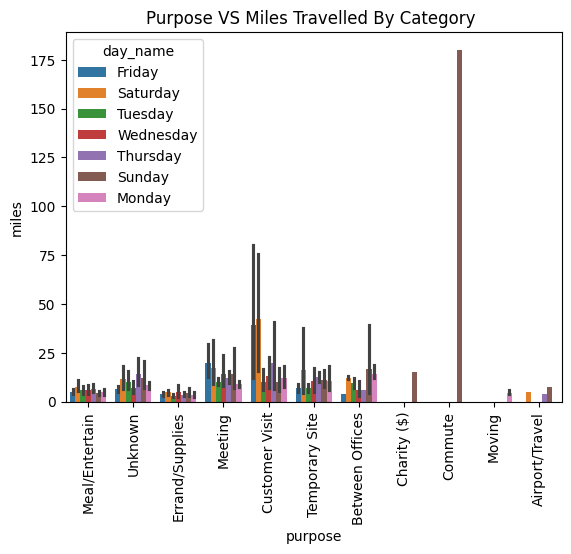

In [330]:
sns.barplot(x= df["purpose"], y= df['miles'],hue = df["day_name"])
plt.title("Purpose VS Miles Travelled By Category ")
plt.xticks(rotation=90)


The plot shows how far users travel each day, indicating their travel patterns over time. It helps identify which days see more or less travel activity.

boxplot

Text(0.5, 1.0, 'Outliers in MILES over TIME')

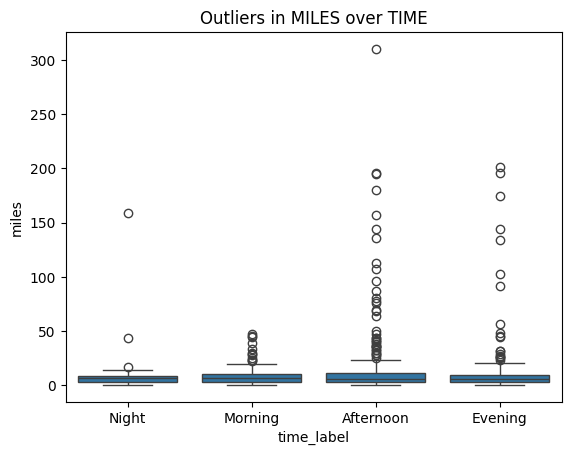

In [331]:
sns.boxplot(x=df["time_label"],y=df["miles"])
plt.title("Outliers in MILES over TIME")

Text(0.5, 1.0, 'Outliers in Duration')

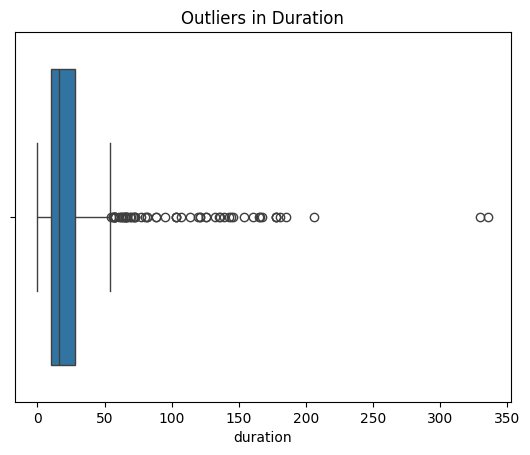

In [332]:
sns.boxplot(x=df["duration"],data=df)
plt.title("Outliers in Duration")

Text(0.5, 1.0, 'Outliers in MILES over TIME')

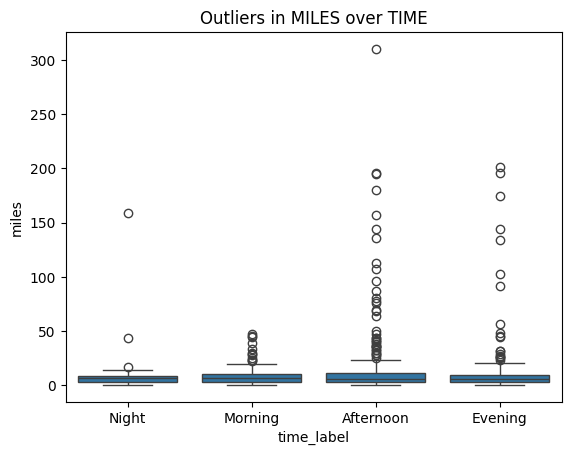

In [333]:
sns.boxplot(x=df["time_label"],y=df["miles"])
plt.title("Outliers in MILES over TIME")

C:\Users\Arunk\AppData\Local\Temp\ipykernel_28036\2912997982.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["miles"])


Text(0.5, 1.0, 'Density PLot for Miles')

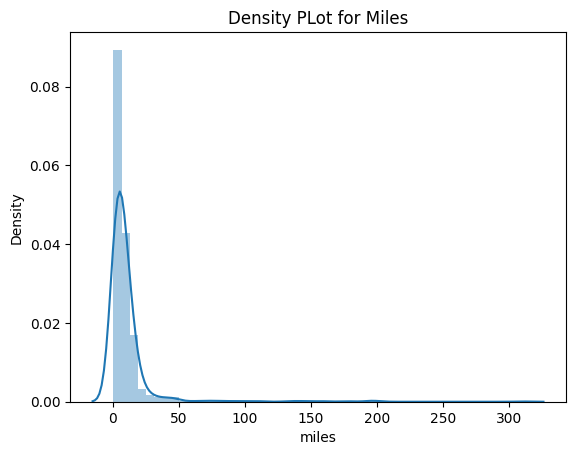

In [334]:
sns.distplot(df["miles"])
plt.title("Density PLot for Miles")


This plot is specifically useful for analyzing the density of miles traveled, allowing you to see how frequently different mileage ranges occur in the Uber rides dataset.

C:\Users\Arunk\AppData\Local\Temp\ipykernel_28036\987357325.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["miles"],hist = False,label="Miles")
C:\Users\Arunk\AppData\Local\Temp\ipykernel_28036\987357325.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["duration"]

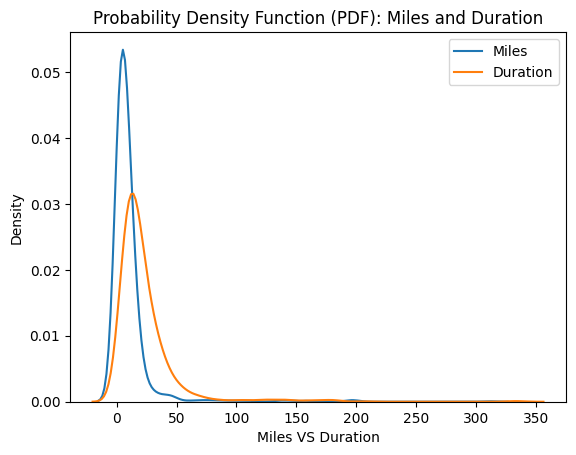

In [335]:
sns.distplot(df["miles"],hist = False,label="Miles")
sns.distplot(df["duration"],hist = False, label="Duration")
plt.title("Probability Density Function (PDF): Miles and Duration")
plt.xlabel("Miles VS Duration")
plt.legend()


This probability density function (PDF) plot is used to visualize the range and density of miles and duration effectively.

In [336]:
# Save DataFrame to CSV file
df.to_csv("clean_file.csv", index=False)

# Conclusion

* In conclusion, my work on analyzing Uber ride data through various visualizations has provided significant insights into user behavior and travel patterns. By utilizing different plotting techniques, such as probability density functions and count plots, I have effectively examined the distribution of ride durations and distances, as well as the reasons behind users' choices for taking rides.

* Through this analysis, I explored essential factors like the time of day, purpose of travel, and day of the week, allowing me to identify trends that can inform operational strategies and improve the overall user experience. This comprehensive examination not only aids in making data-driven decisions but also helps optimize resources and enhance service quality in the ridesharing industry.

* Overall, my analysis contributes to a deeper understanding of user patterns, ultimately supporting the strategic planning needed for improving Uber’s services and operations.